# Workout progress


## Data import

In [146]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [147]:
df = pd.read_csv('data.csv')
df = df.dropna(how='all')

## Calculate average weight

In [148]:
df['weighted_average'] = (
    df['weight'] * df['repetitions'] / df['repetitions_goal'])
average_weights = df.groupby(
    ['date', 'exercise'])['weighted_average'].mean().reset_index()

average_weights = average_weights.sort_values(['exercise', 'date'])

## Average weight graph

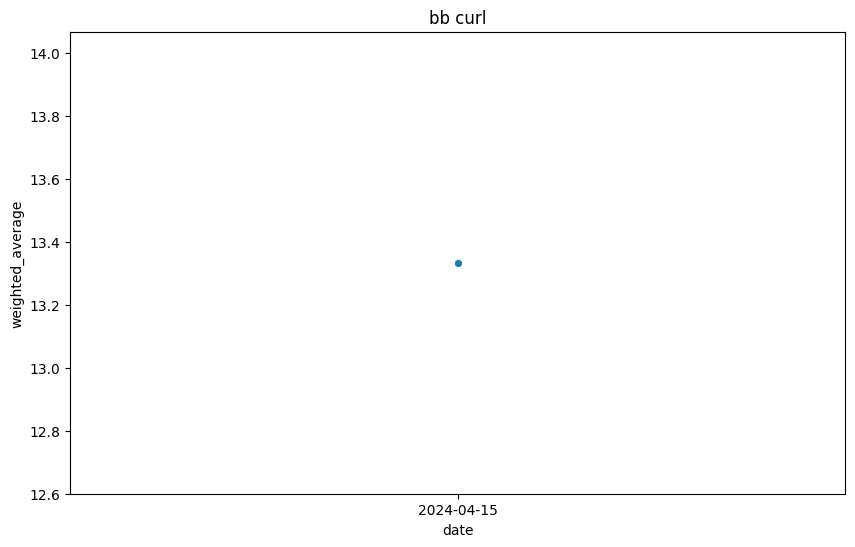

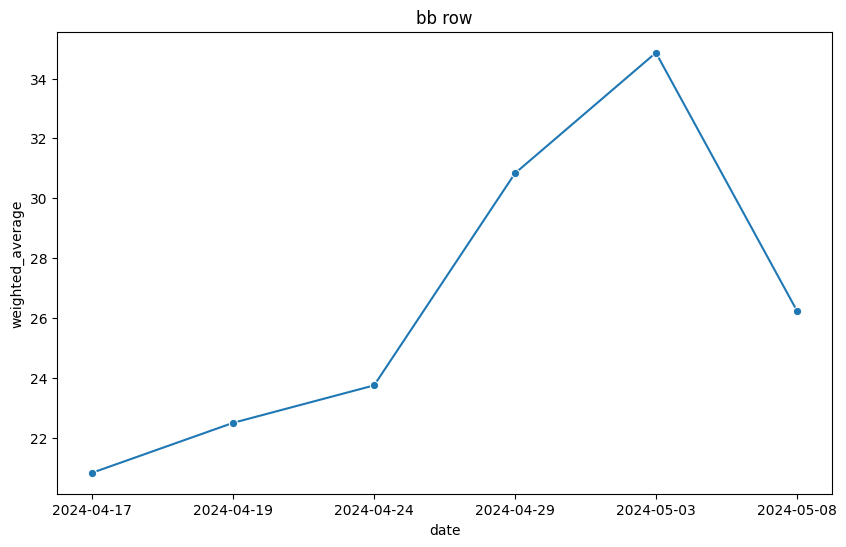

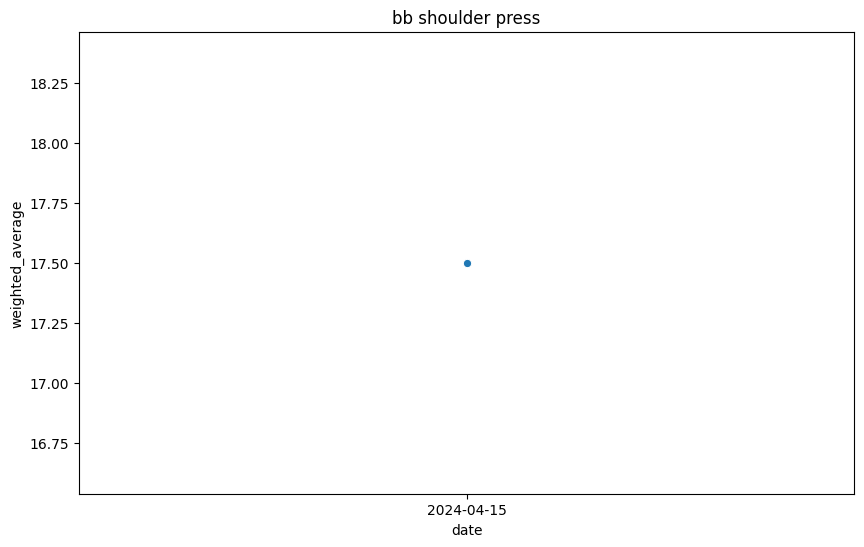

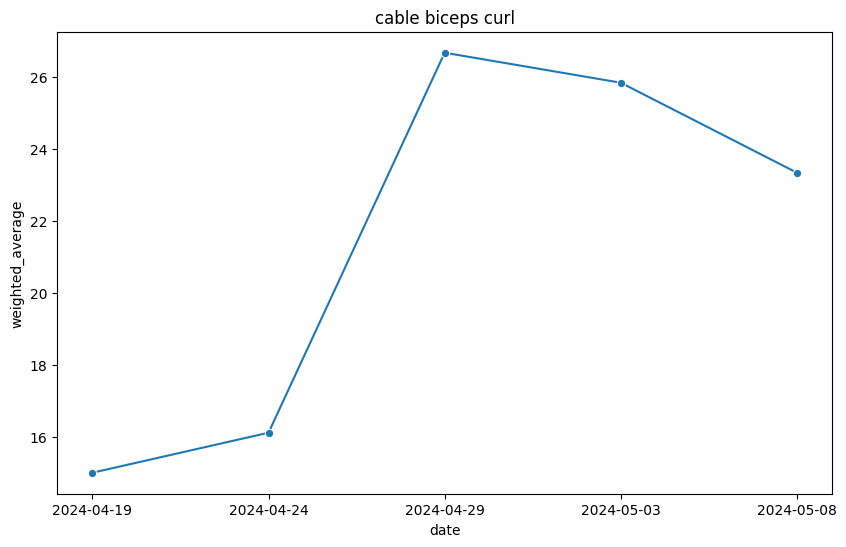

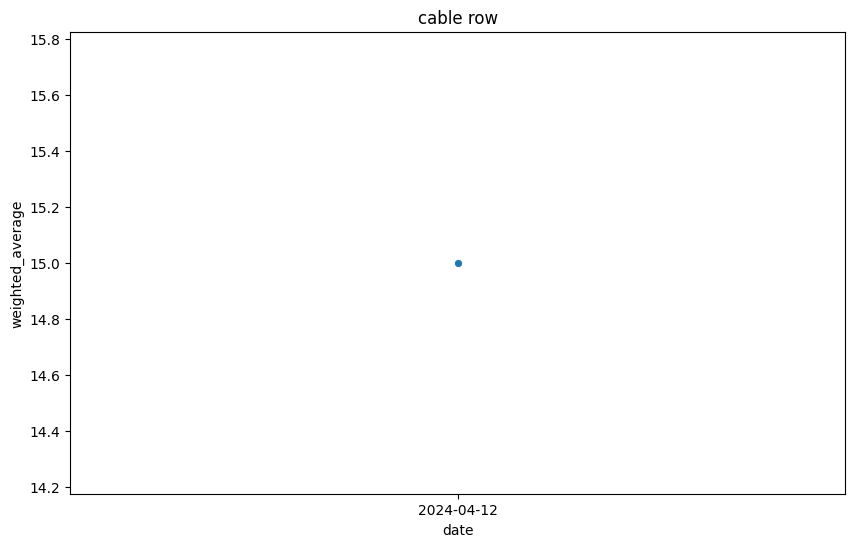

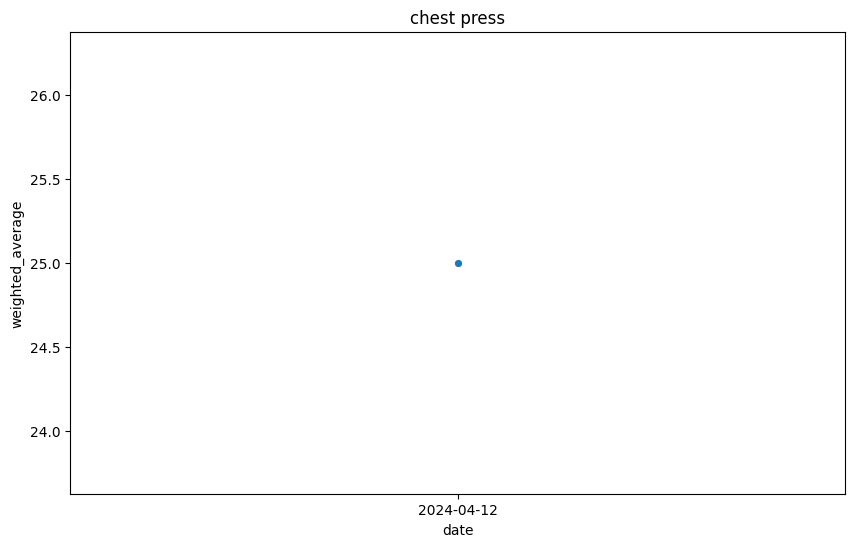

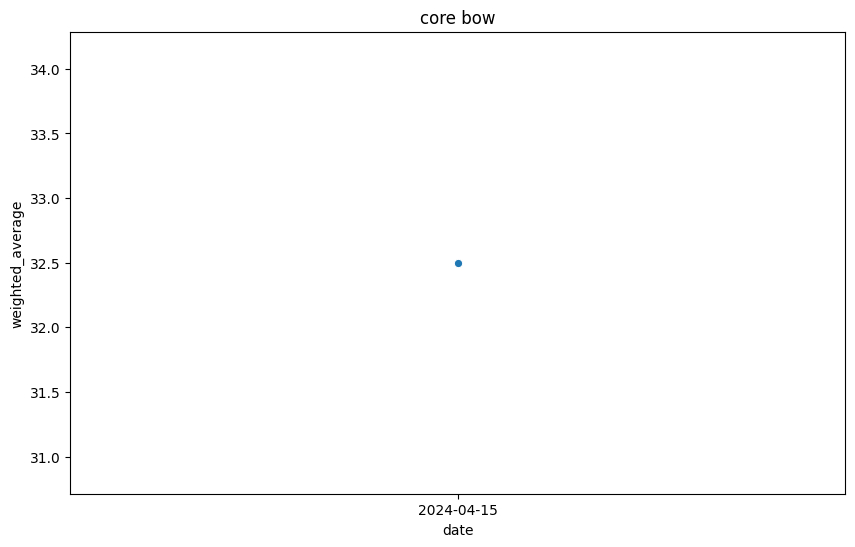

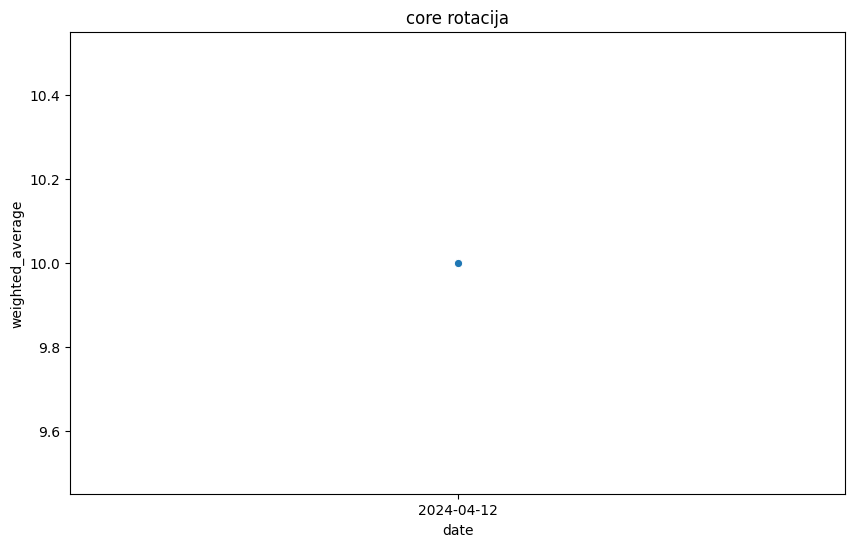

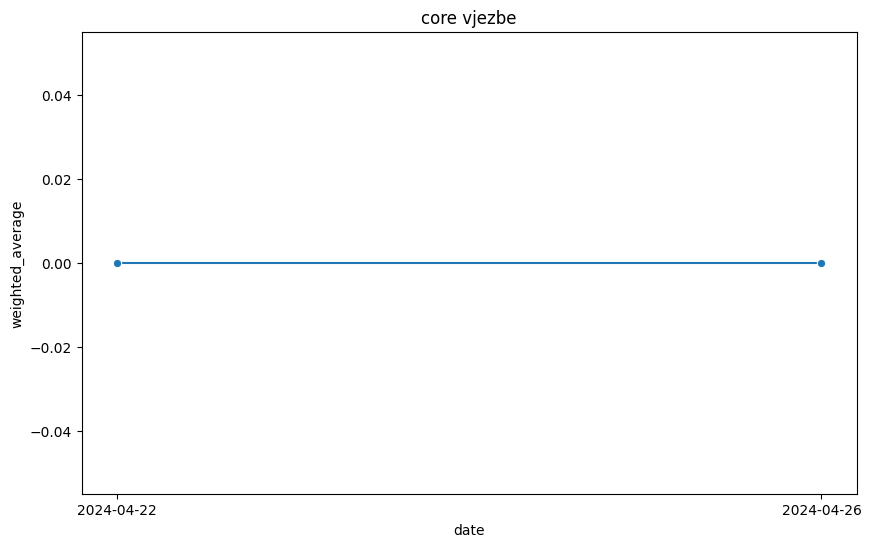

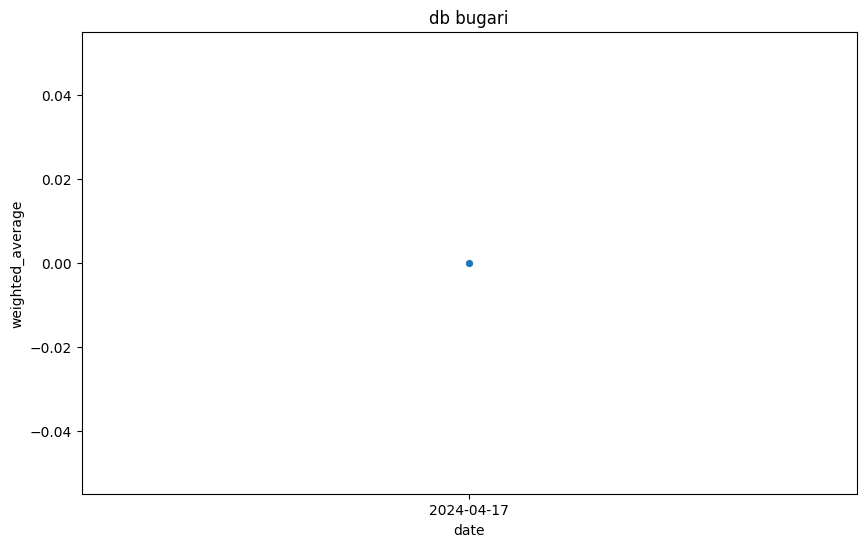

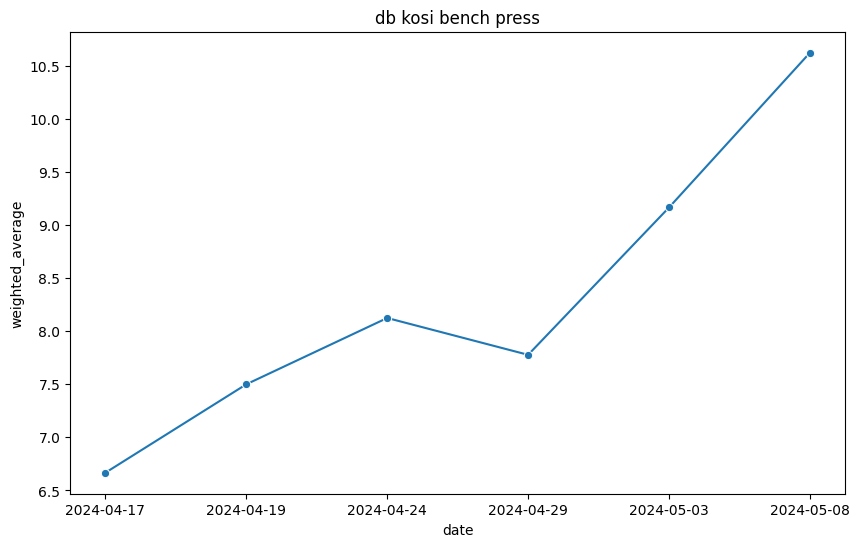

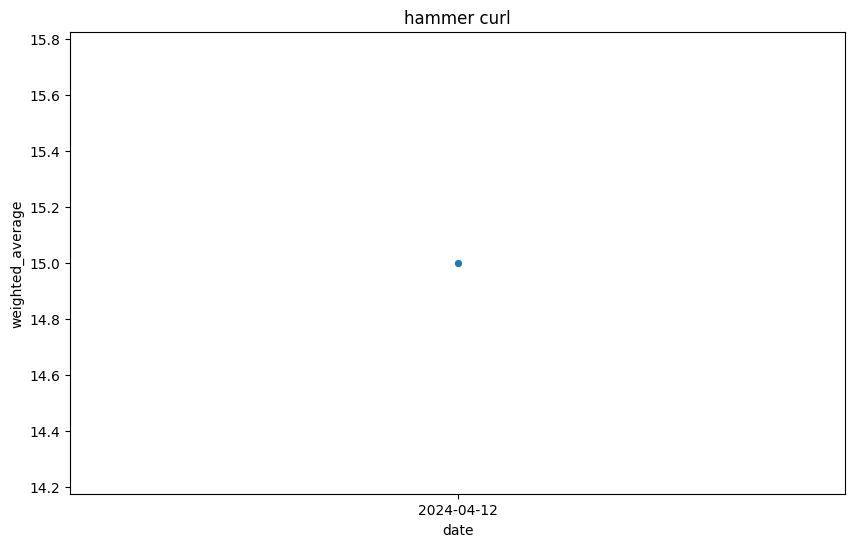

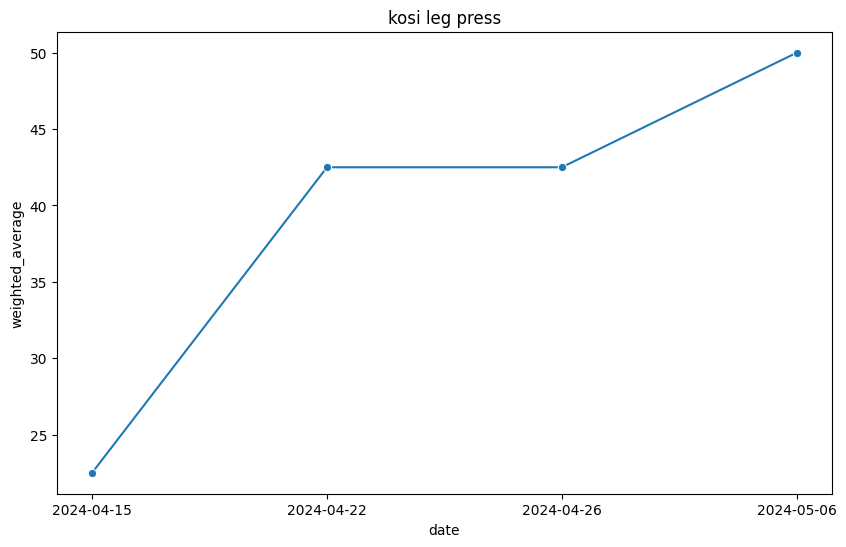

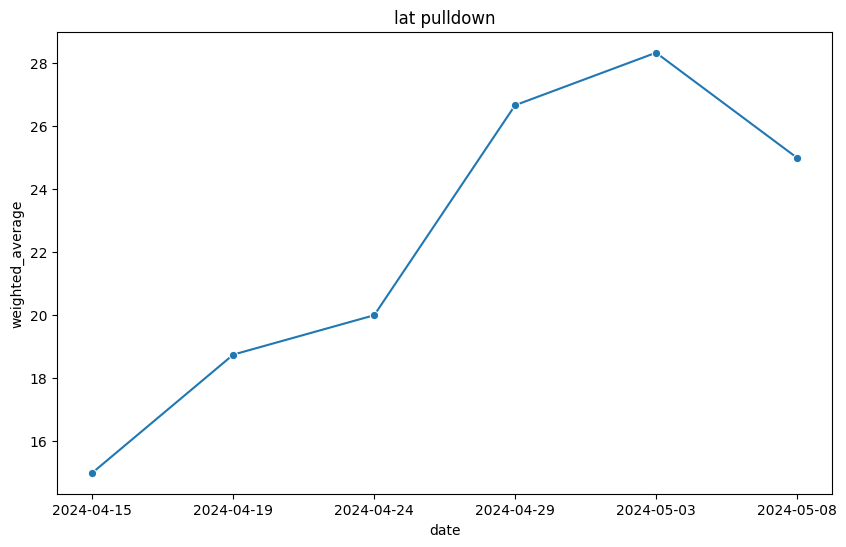

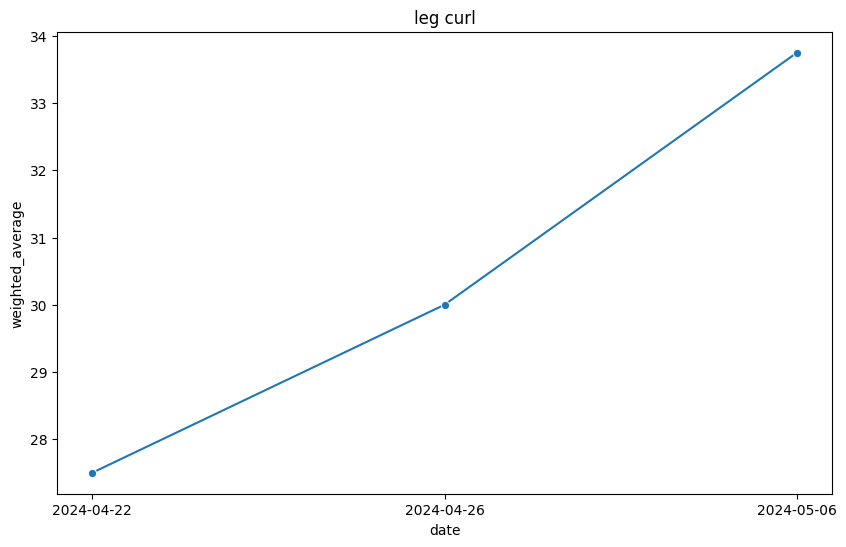

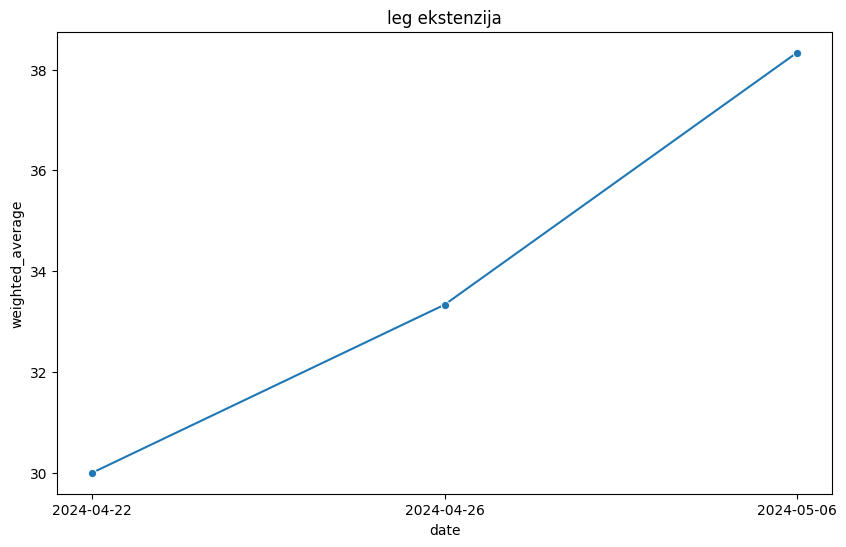

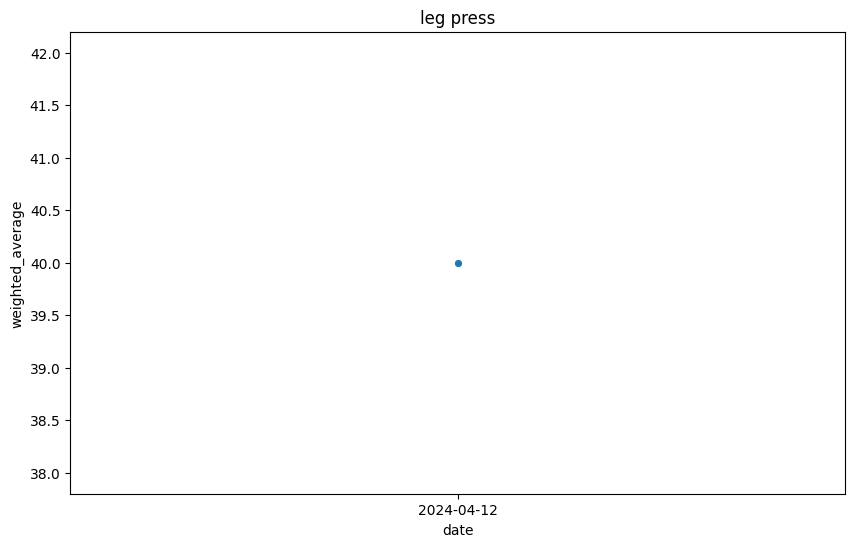

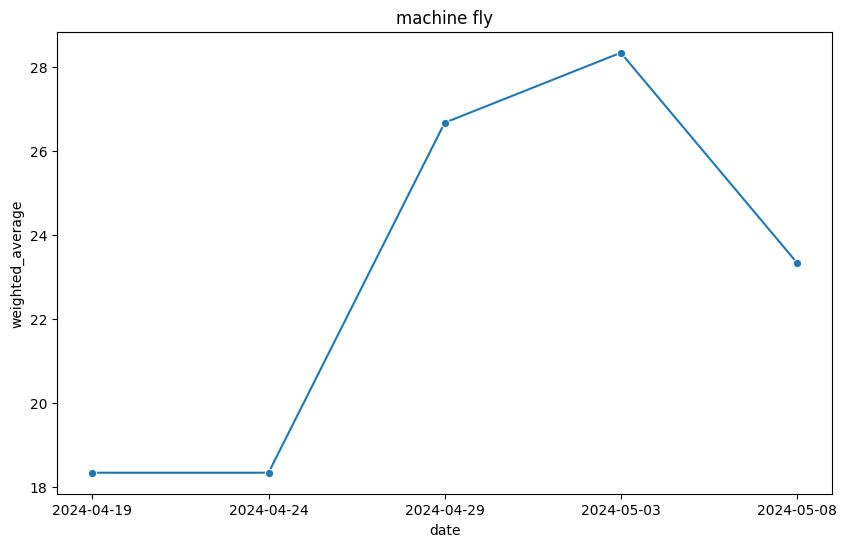

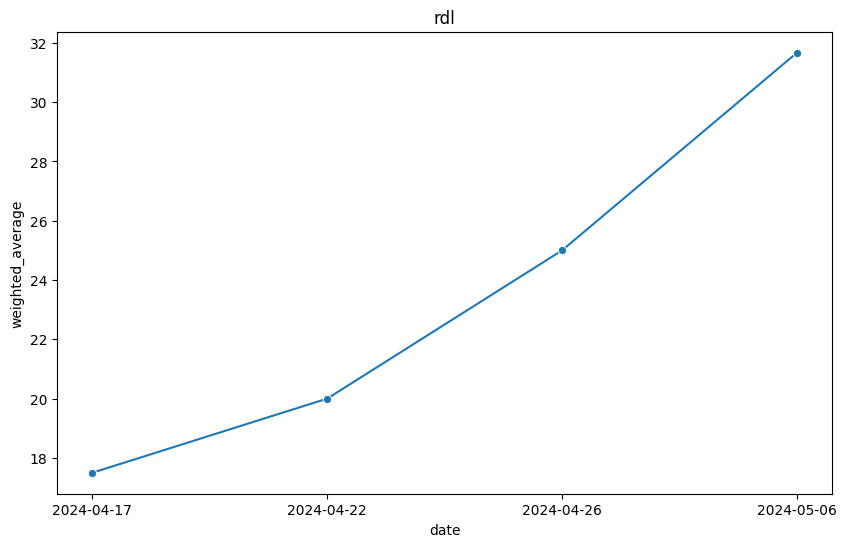

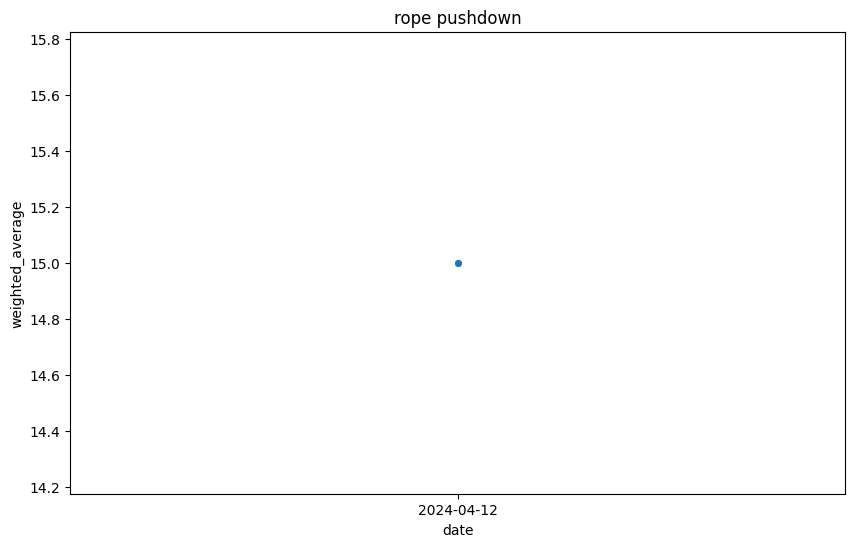

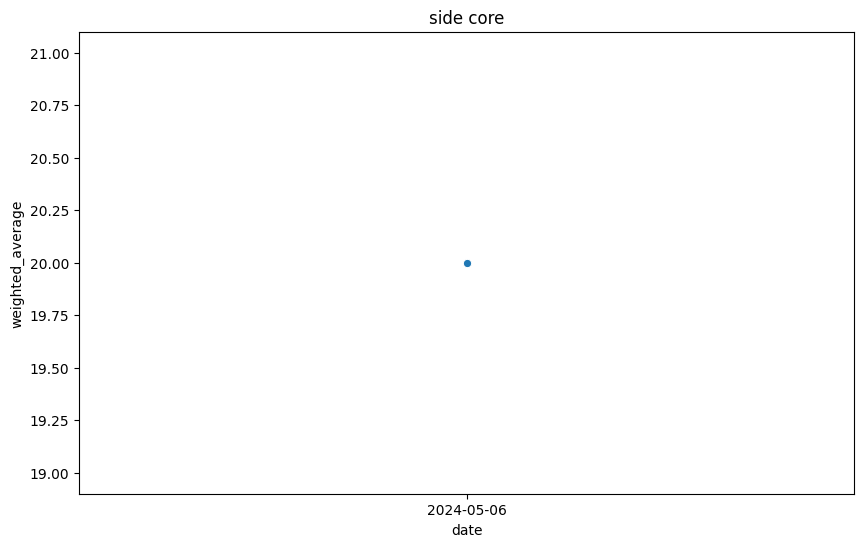

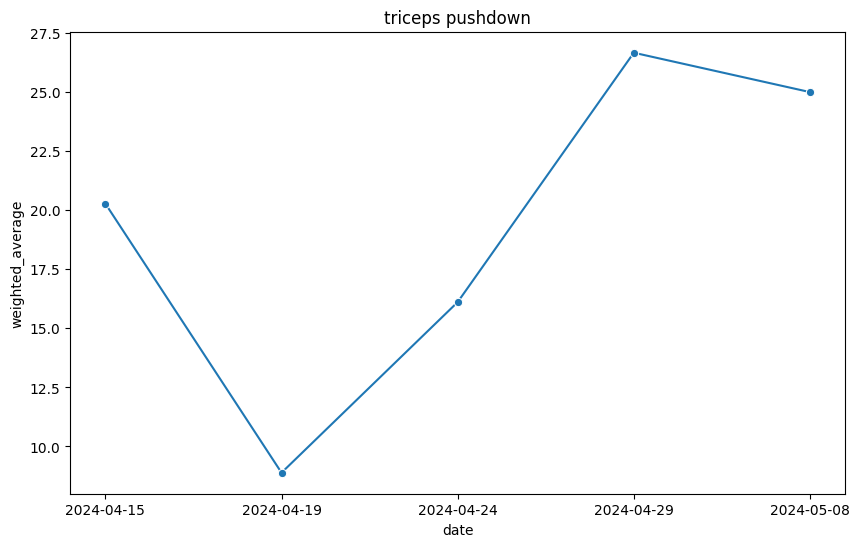

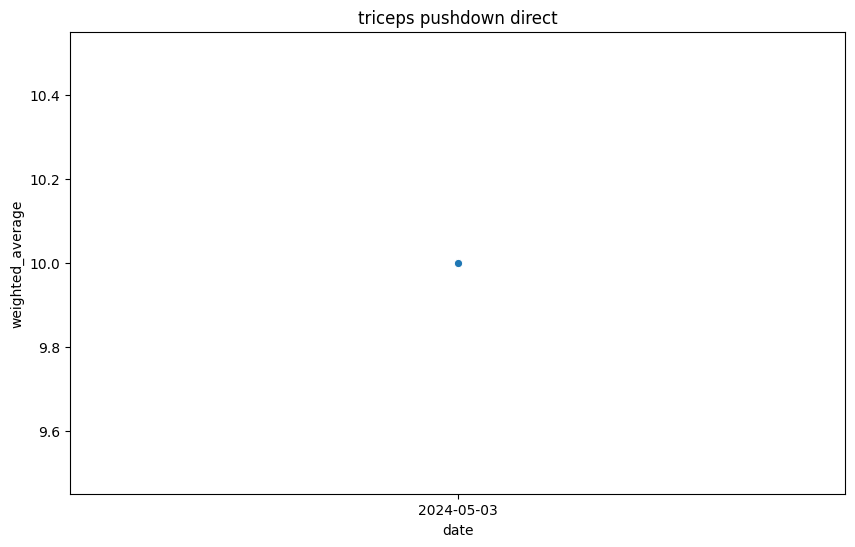

In [149]:
exercises = average_weights['exercise'].unique()
for exercise in exercises:
    exercise_data = average_weights[average_weights['exercise'] == exercise]
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='date', y='weighted_average', data=exercise_data, 
                 marker='o')
    plt.title(exercise)
    plt.show()

## Grade training

In [150]:
average_weights['previous_weighted_average'] = (
    average_weights.groupby('exercise')['weighted_average'].shift())

average_weights['previous_weighted_average'] = (
    average_weights['previous_weighted_average'].fillna(
    average_weights['weighted_average']))

average_weights['training_score'] = 100 * (
    average_weights['weighted_average'] 
    / average_weights['previous_weighted_average']
    - 1)

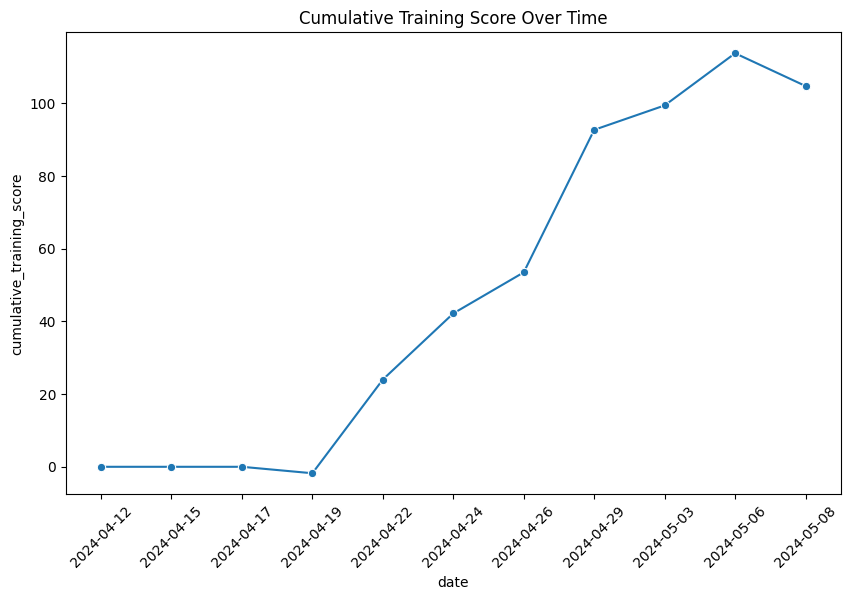

In [152]:
average_training_score = average_weights.groupby('date')[
    'training_score'].mean().reset_index()

average_training_score['cumulative_training_score'] = (
    average_training_score['training_score'].cumsum())

plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='cumulative_training_score', 
             data=average_training_score, marker='o')
plt.title('Cumulative Training Score Over Time')
plt.xticks(rotation=45)
plt.show()